In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Example with the class RegressionNN defined in classyNN.py

In [2]:
import classyNN
import numpy as np
import matplotlib.pyplot as plt

In [3]:
path = "/home/simone/repos/IPAM2021_ML/datasets/GSTLAL_EarlyWarning_Dataset/Dataset/m1m2Mc/"

In [4]:
NN = classyNN.RegressionNN(Nfeatures=3, hlayers_sizes=(100,))
NN.load_train_dataset(fname_x=path+'xtrain.csv', fname_y=path+'ytrain.csv')
#NN.print_info()

No output-intervals specified, using MinMaxScaler


In [5]:
NN.training(verbose=False, epochs=10)
#NN.plot_history()

In [6]:
NN.load_test_dataset(fname_x=path+'xtest.csv', fname_y=path+'ytest.csv') 
NN.print_metrics()

Final R2 mean  : 0.83597
R2[ 0]         : 0.72873
R2[ 1]         : 0.77934
R2[ 2]         : 0.99983


In [7]:
# compute prediction. If you want to remove the normalization, i.e. 
# to have the prediction in physical units, then use 
# inverse_transform=True (default is False, so that NN.compute_prediction()
# is the same of model.prediction() in TF)
prediction = NN.compute_prediction(NN.xtest, transform_output=True)

In [8]:
# Prediction on single array (the correct shape of the input is handled in compute_prediction)

print('Reasonable input:')
m1  = 1.3
m2  = 1.2
Mc  = (m1*m2)**(3/5)/(m1+m2)**(1/5)
pred_test = NN.compute_prediction([m1,m2,Mc], transform_output=True, transform_input=True)
print('input     :', np.array([[m1,m2,Mc]]))
print('prediction:', pred_test)
print('-'*60)

print('Crazy input:')
m1  = 100
m2  = -1
Mc  = -3
pred_test = NN.compute_prediction([m1,m2,Mc], transform_output=True, transform_input=True)
print('input     :', np.array([[m1,m2,Mc]]))
print('prediction:', pred_test)

Reasonable input:
input     : [[1.3        1.2        1.08714321]]
prediction: [[1.30714047 1.19400779 1.086552  ]]
------------------------------------------------------------
Crazy input:
input     : [[100  -1  -3]]
prediction: [[2.3996184 1.5744255 1.46549  ]]


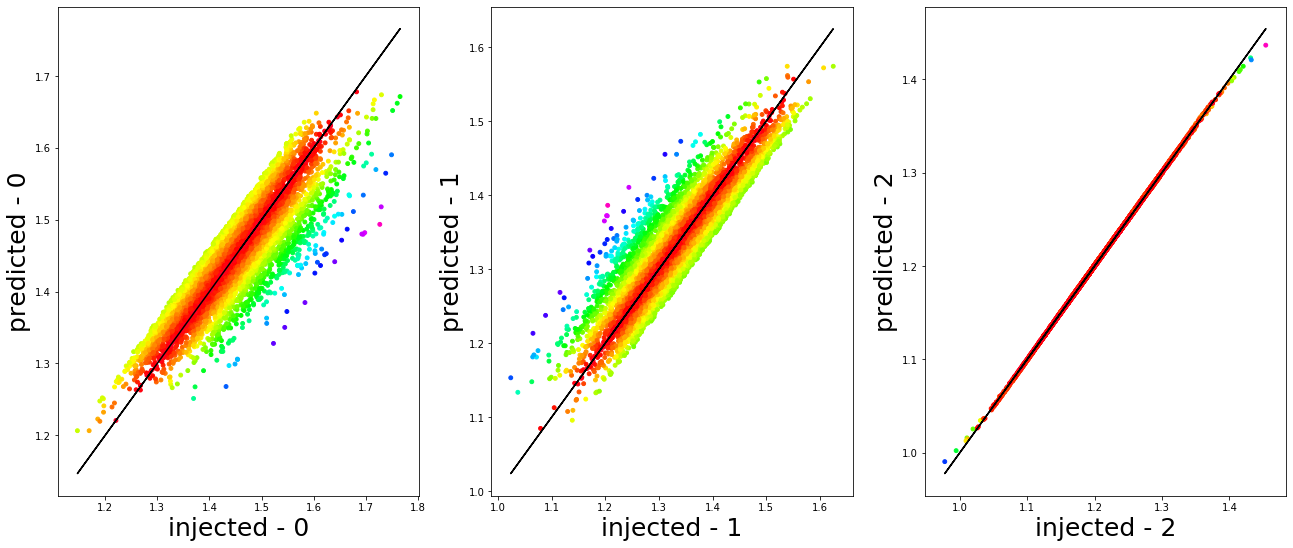

In [9]:
NN.plot_predictions(NN.xtest)

In [10]:
# test with load 
NN.save_model(model_name='example-model', verbose=True)
NN_loaded = classyNN.RegressionNN(load_model='example-model', verbose=True)
NN.print_info()
print('-'*100)
NN_loaded.print_info()

example-model saved
example-model loaded
Nfeatures           : 3
Ntrain              : 13509
batch_size          : 64
epochs              : 10
fit_output          : <keras.callbacks.History object at 0x7ff1c8090760>
hidden_activation   : relu
hlayers_sizes       : (100,)
learning_rate       : 0.001
metrics_dict        : {'loss': 0.007097119931131601, 'mean_squared_error': 0.0070985727943480015, 'R2metric': 0.9552841186523438, 'R2': array([0.72873068, 0.77933568, 0.99983171]), 'R2mean': 0.835966020970374}
model               : <keras.engine.functional.Functional object at 0x7ff1c80ec1c0>
out_intervals       : [[1.2062122,2.3996184],[0.9900429,1.5744255],[0.97205585,1.46549]]
scaler_x            : <classyNN.LinearScaler object at 0x7ff1c89b67f0>
scaler_y            : <classyNN.LinearScaler object at 0x7ff1c89b68e0>
validation_split    : 0.0
----------------------------------------------------------------------------------------------------
Nfeatures           : 3
Ntrain              : 13

## NN with hard-constraints

In [11]:
# here the key-aspect is out_interval! See the ouput with a 'crazy' input in the next cell
out_intervals = [[1,2.2],[1,1.8],[0.9,1.6]]

NNhc = classyNN.RegressionNN(Nfeatures=3, hlayers_sizes=(100,), out_intervals=out_intervals)
NNhc.load_train_dataset(fname_x=path+'xtrain.csv', fname_y=path+'ytrain.csv')

NNhc.training(verbose=False, epochs=10)

NNhc.load_test_dataset(fname_x=path+'xtest.csv', fname_y=path+'ytest.csv') 

In [12]:
print('-'*70,'NN: Neural Network withou hard-constraints (i.e. MinMaxScaler)','-'*70, sep='\n', end='\n')
NN.print_metrics()
print('-'*70,'NNhc: hard-constraints','-'*70, sep='\n', end='\n')
NNhc.print_metrics()

----------------------------------------------------------------------
NN: Neural Network withou hard-constraints (i.e. MinMaxScaler)
----------------------------------------------------------------------
Final R2 mean  : 0.83597
R2[ 0]         : 0.72873
R2[ 1]         : 0.77934
R2[ 2]         : 0.99983
----------------------------------------------------------------------
NNhc: hard-constraints
----------------------------------------------------------------------
Final R2 mean  : 0.83516
R2[ 0]         : 0.72743
R2[ 1]         : 0.77822
R2[ 2]         : 0.99984


In [13]:
print('Reasonable input:')
m1  = 1.3
m2  = 1.2
Mc  = (m1*m2)**(3/5)/(m1+m2)**(1/5)
pred_test = NNhc.compute_prediction([m1,m2,Mc], transform_output=True, transform_input=True)
print('input     :', np.array([[m1,m2,Mc]]))
print('prediction:', pred_test)
print('-'*60)

print('Crazy input:')
m1  = 100
m2  = -1
Mc  = -3
pred_test = NNhc.compute_prediction([m1,m2,Mc], transform_output=True, transform_input=True)
print('input     :', np.array([[m1,m2,Mc]]))
print('prediction:', pred_test)

Reasonable input:
input     : [[1.3        1.2        1.08714321]]
prediction: [[1.31049007 1.19230425 1.08573748]]
------------------------------------------------------------
Crazy input:
input     : [[100  -1  -3]]
prediction: [[2.2 1.8 1.6]]


## Using results of the new code for 'old' modules like fancyplots.py

In [14]:
import sys
sys.path.insert(0, '/home/simone/repos/IPAM2021_ML/utils')   
import fancyplots as fp

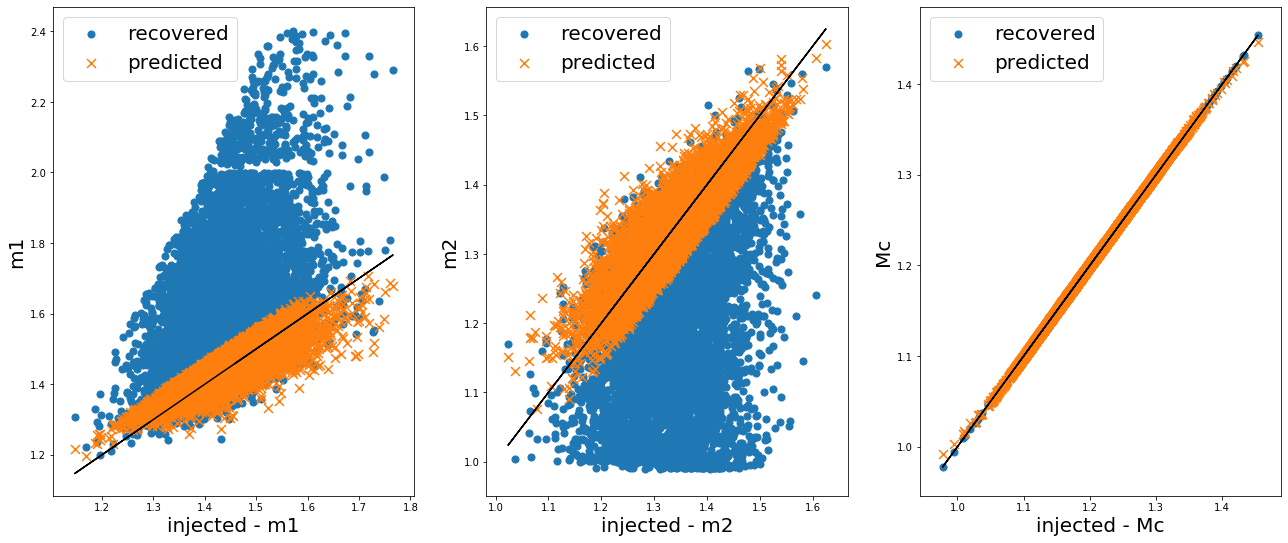

In [15]:
prediction = NNhc.compute_prediction(NNhc.xtest) # normalized prediction

fp.checkRegressionPlot(NNhc.xtest, NNhc.ytest, prediction, ['m1','m2','Mc'], \
                       scaler_y=NNhc.scaler_y, scaler_x=NNhc.scaler_x)

#fp.plotInjRecPred(NN.ytest_notnorm, NN.xtest_notnorm, NN.scaler_y.inverse_transform(prediction), idx_Mc=2)